Importing Necessary Libraries

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score

Loading the Dataset in a dataframe

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isnull().sum().max()

0

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 represents Legit Transactions whereas 1 represents Fraud Transactions

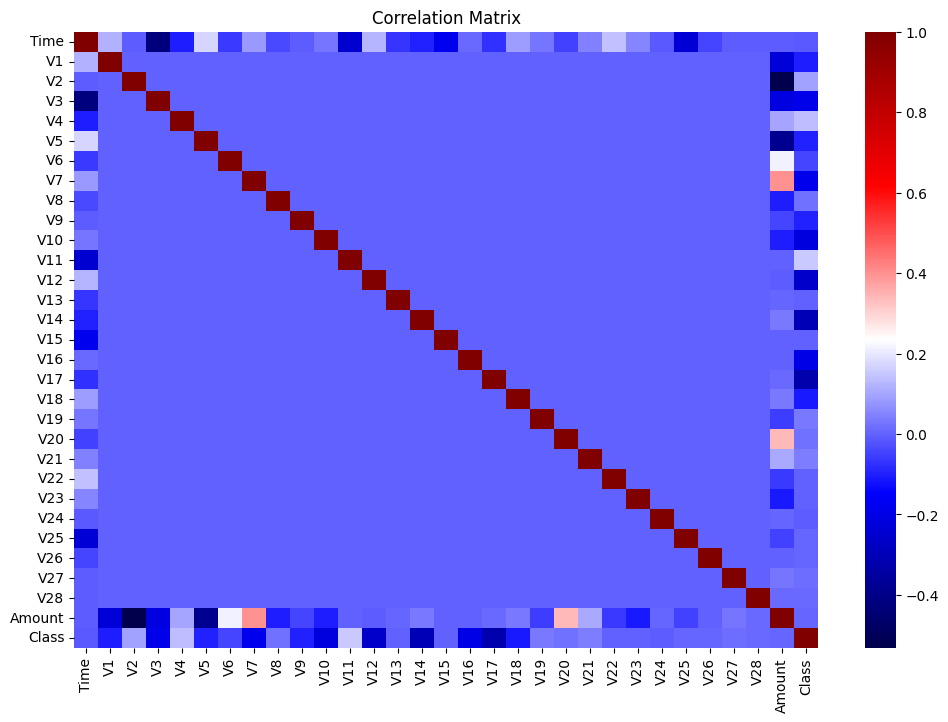

In [7]:
# correlation
plt.figure(figsize=(12,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix,cmap='seismic',annot=False)
plt.title('Correlation Matrix')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))
confusion_matrix(clf, X_test_scaled, y_test, display_labels=['Legit', 'Fraud'])
plt.title('Confusion Matrix')
plt.show()

NameError: ignored

<Figure size 800x600 with 0 Axes>

In [13]:
legit = data[data.Class==0]
fraud = data[data.Class==1]

In [14]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [15]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Building a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [19]:
legit_sample = legit.sample(n=492)

In [20]:
legit_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279465,168886.0,-0.570263,1.188924,-0.656708,-0.364561,-0.025238,-0.223575,-0.445212,0.880703,0.405707,...,0.378583,1.025370,0.020374,0.357743,-0.739990,-0.362918,-0.156742,0.033376,5.89,0
204886,135489.0,-0.520633,1.469393,-0.517163,0.135878,0.418742,-1.147052,0.794092,-0.404478,0.365216,...,0.268708,0.700624,-0.288471,-0.104621,0.331474,0.027485,-0.606963,0.029189,4.00,0
156975,109278.0,2.022322,0.227793,-1.511709,1.596430,0.414597,-1.090271,0.472958,-0.425186,1.683562,...,-0.115617,0.067126,0.010389,-0.173764,0.398710,-0.520176,-0.051119,-0.070674,15.55,0
238589,149734.0,2.035098,-0.071154,-1.169417,0.209290,0.162577,-0.601334,0.102307,-0.176750,0.207249,...,-0.246327,-0.571499,0.286751,-0.378253,-0.278159,0.201909,-0.067584,-0.072737,1.29,0
134782,80961.0,-0.642795,1.061424,1.006146,-0.215278,0.242010,-0.055727,0.411495,0.333203,-0.202634,...,-0.254771,-0.676659,-0.005422,-0.406988,-0.221521,0.114544,0.353971,0.140860,7.16,0


Comcatenating two dataframes

In [21]:
new_dataset = pd.concat([legit_sample,fraud], axis = 0)

In [22]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279465,168886.0,-0.570263,1.188924,-0.656708,-0.364561,-0.025238,-0.223575,-0.445212,0.880703,0.405707,...,0.378583,1.025370,0.020374,0.357743,-0.739990,-0.362918,-0.156742,0.033376,5.89,0
204886,135489.0,-0.520633,1.469393,-0.517163,0.135878,0.418742,-1.147052,0.794092,-0.404478,0.365216,...,0.268708,0.700624,-0.288471,-0.104621,0.331474,0.027485,-0.606963,0.029189,4.00,0
156975,109278.0,2.022322,0.227793,-1.511709,1.596430,0.414597,-1.090271,0.472958,-0.425186,1.683562,...,-0.115617,0.067126,0.010389,-0.173764,0.398710,-0.520176,-0.051119,-0.070674,15.55,0
238589,149734.0,2.035098,-0.071154,-1.169417,0.209290,0.162577,-0.601334,0.102307,-0.176750,0.207249,...,-0.246327,-0.571499,0.286751,-0.378253,-0.278159,0.201909,-0.067584,-0.072737,1.29,0
134782,80961.0,-0.642795,1.061424,1.006146,-0.215278,0.242010,-0.055727,0.411495,0.333203,-0.202634,...,-0.254771,-0.676659,-0.005422,-0.406988,-0.221521,0.114544,0.353971,0.140860,7.16,0


In [23]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [24]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [25]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96181.351626,0.012083,0.107459,0.016246,-0.070407,0.004479,0.033684,0.021794,0.092575,0.106572,...,0.015780,-0.014370,-0.022948,-0.004755,0.001567,0.035288,0.009001,-0.003467,-0.003753,80.114919
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [26]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

In [29]:
model = LogisticRegression()

In [30]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)


LogisticRegression()

In [31]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9491740787801779


In [33]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9441624365482234


In [35]:
# models = pd.DataFrame(
#     {
#         "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "K Nearest Neighbors"],
#         "SCORES": [LRScore, RFScore, DTScore, GBScore, KNNScore]
#     }
# )
# models.sort_values(by='SCORES', ascending=False)

In [36]:
from sklearn import metrics

In [38]:
score = round(model.score(X_test, Y_test)*100,2)
print('score of our model is :', score)

score of our model is : 94.42


In [46]:
y_pred = model.predict(X_test)
acc_score = round(accuracy_score(y_pred, Y_test)*100,2)
class_report = classification_report(y_pred, Y_test)
print('classification report of our model: ', class_report)

classification report of our model:                precision    recall  f1-score   support

           0       0.97      0.92      0.95       104
           1       0.92      0.97      0.94        93

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197



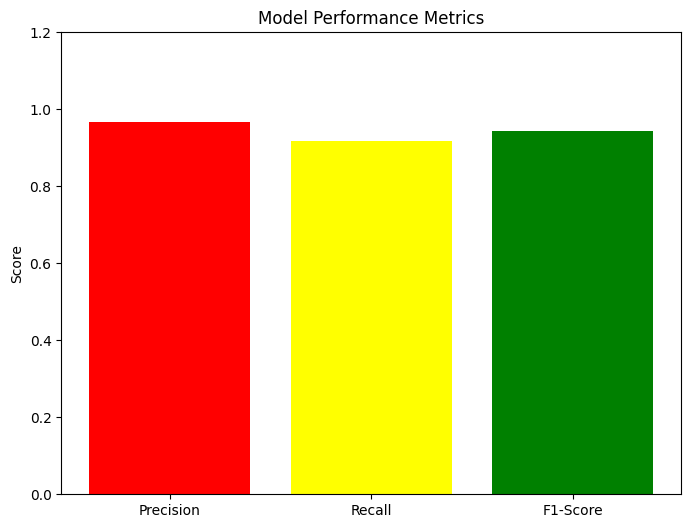

In [50]:
# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
# f1_score
f1 = f1_score(Y_test, y_pred)

# Plot precision, recall, and F1-score using bar plots
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['red', 'yellow', 'green'])
plt.ylim(0, 1.2)  # Set y-axis limit
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()